In [82]:
import pandas as pd
import numpy as np
from sklearn.linear_model import RidgeClassifier, LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
from sklearn import set_config
set_config(display='diagram')

In [83]:
df = pd.read_csv('iris.csv')
X = df.drop(columns = ['class'])
y = df['class']

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [85]:
df

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [86]:
lr = LogisticRegression(random_state=123, max_iter=10000)
lr.fit(X_train,y_train)
y_pred_train = lr.predict(X_train)
y_pred = lr.predict(X_test)

print(classification_report(y_train,y_pred_train,digits = 4))
print(classification_report(y_test,y_pred,digits = 4))

                 precision    recall  f1-score   support

    Iris-setosa     1.0000    1.0000    1.0000        32
Iris-versicolor     0.9512    0.9750    0.9630        40
 Iris-virginica     0.9688    0.9394    0.9538        33

       accuracy                         0.9714       105
      macro avg     0.9733    0.9715    0.9723       105
   weighted avg     0.9716    0.9714    0.9714       105

                 precision    recall  f1-score   support

    Iris-setosa     1.0000    1.0000    1.0000        18
Iris-versicolor     0.7692    1.0000    0.8696        10
 Iris-virginica     1.0000    0.8235    0.9032        17

       accuracy                         0.9333        45
      macro avg     0.9231    0.9412    0.9243        45
   weighted avg     0.9487    0.9333    0.9345        45



In [87]:
lda = LinearDiscriminantAnalysis() # no tiene hiperparámetros como modelo
lda.fit(X_train,y_train)
y_pred_train = lda.predict(X_train)
y_pred = lda.predict(X_test)

print(classification_report(y_train,y_pred_train,digits = 4))
print(classification_report(y_test,y_pred,digits = 4))


                 precision    recall  f1-score   support

    Iris-setosa     1.0000    1.0000    1.0000        32
Iris-versicolor     1.0000    0.9500    0.9744        40
 Iris-virginica     0.9429    1.0000    0.9706        33

       accuracy                         0.9810       105
      macro avg     0.9810    0.9833    0.9816       105
   weighted avg     0.9820    0.9810    0.9810       105

                 precision    recall  f1-score   support

    Iris-setosa     1.0000    1.0000    1.0000        18
Iris-versicolor     0.9091    1.0000    0.9524        10
 Iris-virginica     1.0000    0.9412    0.9697        17

       accuracy                         0.9778        45
      macro avg     0.9697    0.9804    0.9740        45
   weighted avg     0.9798    0.9778    0.9780        45



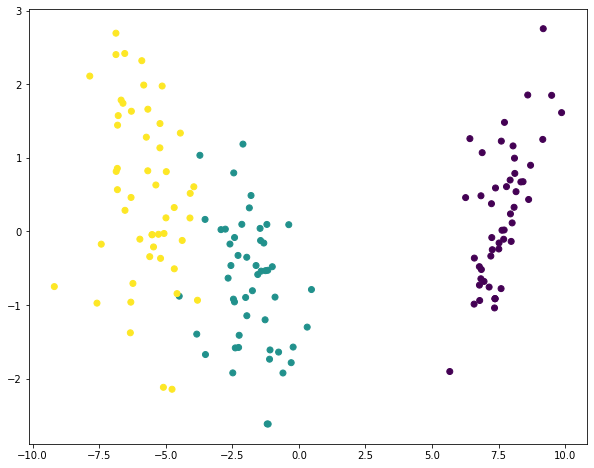

In [88]:
# Por qué LDA es mejor que LR?

lda_dr = LinearDiscriminantAnalysis(n_components=2) # Algoritmo de reducción de dimensionalidad

componentes = lda_dr.fit_transform(X, y) # PCA es no supervisado
color_code = y.astype('category').cat.codes

plt.figure(figsize =(10,8))
plt.scatter(componentes[:,0],componentes[:,1], c = color_code);

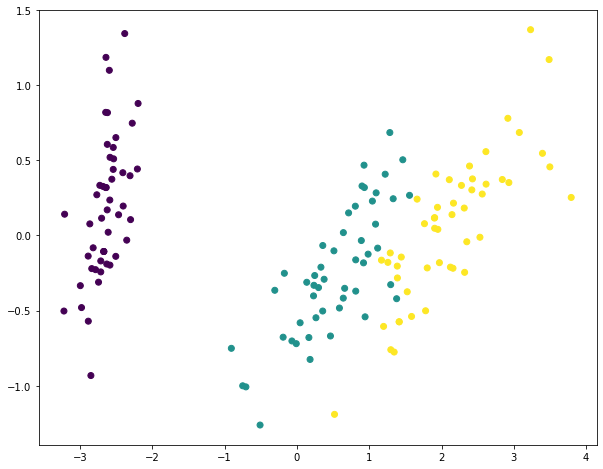

In [89]:
# Por qué LDA es mejor que LR?

pca = PCA(n_components=2) # Algoritmo de reducción de dimensionalidad

componentes = pca.fit_transform(X) # PCA es no supervisado
color_code = y.astype('category').cat.codes

plt.figure(figsize =(10,8))
plt.scatter(componentes[:,0],componentes[:,1], c = color_code);

In [90]:
qda = QuadraticDiscriminantAnalysis() # No tiene hiperparámetros como modelo. No tiene opción de transform...

componentes = qda.fit(X, y)  # PCA es no supervisado
y_pred_train = qda.predict(X_train)
y_pred = qda.predict(X_test)

print(classification_report(y_train,y_pred_train,digits = 4))
print(classification_report(y_test,y_pred,digits = 4))

                 precision    recall  f1-score   support

    Iris-setosa     1.0000    1.0000    1.0000        32
Iris-versicolor     1.0000    0.9500    0.9744        40
 Iris-virginica     0.9429    1.0000    0.9706        33

       accuracy                         0.9810       105
      macro avg     0.9810    0.9833    0.9816       105
   weighted avg     0.9820    0.9810    0.9810       105

                 precision    recall  f1-score   support

    Iris-setosa     1.0000    1.0000    1.0000        18
Iris-versicolor     0.9091    1.0000    0.9524        10
 Iris-virginica     1.0000    0.9412    0.9697        17

       accuracy                         0.9778        45
      macro avg     0.9697    0.9804    0.9740        45
   weighted avg     0.9798    0.9778    0.9780        45



In [91]:
df = pd.read_csv('winequality-red.csv')

df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [92]:
## Dataset tiene un problemilla...
# Desbalance de clases...
df = df.query('quality not in [3,4,8]')

In [93]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as Imb_Pipeline

## Modelación

In [94]:
X, y = df.drop(columns='quality'), df.quality
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=123, stratify=y)

In [95]:
y_train.value_counts()

5    477
6    446
7    139
Name: quality, dtype: int64

In [96]:
## Primer modelo: Baseline Logistic regression
lr = LogisticRegression(max_iter=10000, random_state=123)
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
print(classification_report(y_test,y_pred, digits = 4))

              precision    recall  f1-score   support

           5     0.6916    0.7696    0.7285       204
           6     0.5771    0.6042    0.5903       192
           7     0.6429    0.3000    0.4091        60

    accuracy                         0.6382       456
   macro avg     0.6372    0.5579    0.5760       456
weighted avg     0.6370    0.6382    0.6283       456



In [97]:
smote = SMOTE(sampling_strategy='auto',random_state=123)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
y_resampled.value_counts()
## Crea muestras sintéticas, basadas en vecinos cercanos... Oversampling... aumenta las clases minoritarias... 

5    477
7    477
6    477
Name: quality, dtype: int64

In [98]:
## Primer modelo: Baseline Logistic regression
lr = LogisticRegression(max_iter=10000, random_state=123)
lr.fit(X_resampled,y_resampled) # RESAMPLE SE HACE SOLO EN TRAIN.... NUNCA EN TEST....
y_pred = lr.predict(X_test)
print(classification_report(y_test,y_pred, digits = 4))

              precision    recall  f1-score   support

           5     0.7059    0.7647    0.7341       204
           6     0.6466    0.3906    0.4870       192
           7     0.4034    0.8000    0.5363        60

    accuracy                         0.6118       456
   macro avg     0.5853    0.6518    0.5858       456
weighted avg     0.6411    0.6118    0.6040       456



In [101]:
## Primer modelo: Baseline Logistic regression
lda = LinearDiscriminantAnalysis()
lda.fit(X_resampled,y_resampled) # RESAMPLE SE HACE SOLO EN TRAIN.... NUNCA EN TEST....
y_pred = lda.predict(X_test)
print(classification_report(y_test,y_pred, digits = 4))

              precision    recall  f1-score   support

           5     0.7230    0.7549    0.7386       204
           6     0.6667    0.4479    0.5358       192
           7     0.4386    0.8333    0.5747        60

    accuracy                         0.6360       456
   macro avg     0.6094    0.6787    0.6164       456
weighted avg     0.6619    0.6360    0.6317       456



In [103]:
## Pipeline

pipe = Imb_Pipeline(steps = [
    ('smote', SMOTE(sampling_strategy='auto', random_state=123)),
    ('sc', StandardScaler()),
    ('lda',LinearDiscriminantAnalysis())
])

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
print(classification_report(y_test,y_pred, digits = 4))

              precision    recall  f1-score   support

           5     0.7230    0.7549    0.7386       204
           6     0.6667    0.4479    0.5358       192
           7     0.4386    0.8333    0.5747        60

    accuracy                         0.6360       456
   macro avg     0.6094    0.6787    0.6164       456
weighted avg     0.6619    0.6360    0.6317       456



In [104]:
## Pipeline

pipe = Imb_Pipeline(steps = [
    ('smote', SMOTE(sampling_strategy='auto', random_state=123)),
    ('sc', StandardScaler()),
    ('lda',LinearDiscriminantAnalysis()), # no es reducción, sino que es transformación
    ('lr',LogisticRegression(random_state=123,max_iter=10000))
])

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
print(classification_report(y_test,y_pred, digits = 4))

              precision    recall  f1-score   support

           5     0.7230    0.7549    0.7386       204
           6     0.6692    0.4531    0.5404       192
           7     0.4425    0.8333    0.5780        60

    accuracy                         0.6382       456
   macro avg     0.6116    0.6805    0.6190       456
weighted avg     0.6635    0.6382    0.6340       456



In [106]:
## Búsqueda de grilla, Gridsearch... buscar hiperparámetros...
params = {
    'lr__C': np.logspace(-3,3,7)
}

In [116]:
## Pipeline

pipe = Imb_Pipeline(steps = [
    ('smote', SMOTE(sampling_strategy='auto', random_state=123)),
    ('sc', StandardScaler()),
    ('lda',LinearDiscriminantAnalysis()), # no es reducción, sino que es transformación
    ('lr',LogisticRegression(random_state=123,max_iter=10000))
])

search = GridSearchCV(pipe, params, cv = 5, scoring = 'accuracy', n_jobs = -1)
search.fit(X_train, y_train)

pd.DataFrame(search.cv_results_)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_lr__C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.023098,0.001266,0.002409,0.000595,0.001,{'lr__C': 0.001},0.535211,0.544601,0.528302,0.575472,0.518868,0.540491,0.019414,7
1,0.027654,0.004390,0.002324,0.000248,0.01,{'lr__C': 0.01},0.544601,0.553991,0.613208,0.603774,0.542453,0.571605,0.030512,4
2,0.032165,0.003466,0.002423,0.000384,0.1,{'lr__C': 0.1},0.516432,0.563380,0.627358,0.584906,0.556604,0.569736,0.036345,6
3,0.042211,0.015157,0.003113,0.001072,1.0,{'lr__C': 1.0},0.516432,0.568075,0.627358,0.584906,0.556604,0.570675,0.036229,5
4,0.029434,0.004947,0.005428,0.004654,10.0,{'lr__C': 10.0},0.516432,0.568075,0.627358,0.584906,0.561321,0.571618,0.035910,1
5,0.039125,0.016690,0.002423,0.000514,100.0,{'lr__C': 100.0},0.516432,0.568075,0.627358,0.584906,0.561321,0.571618,0.035910,1
6,0.028212,0.007096,0.002311,0.000690,1000.0,{'lr__C': 1000.0},0.516432,0.568075,0.627358,0.584906,0.561321,0.571618,0.035910,1


In [117]:
best_model = search.best_estimator_
best_model.predict(X_test)
print(classification_report(y_test,y_pred, digits = 4))

              precision    recall  f1-score   support

           5     0.7230    0.7549    0.7386       204
           6     0.6692    0.4531    0.5404       192
           7     0.4425    0.8333    0.5780        60

    accuracy                         0.6382       456
   macro avg     0.6116    0.6805    0.6190       456
weighted avg     0.6635    0.6382    0.6340       456



In [119]:
pipe = Pipeline(steps=[
    ('sc', StandardScaler()),
    ('dr', LinearDiscriminantAnalysis()),
    ('clf', LogisticRegression(random_state=123))
])

params = {'dr': [LinearDiscriminantAnalysis(), PCA()],
          'clf': [QuadraticDiscriminantAnalysis(),
                  RidgeClassifier(random_state=123),
                  LogisticRegression(random_state=123),
                  RandomForestClassifier(random_state=123, n_jobs=-1)]}


search = GridSearchCV(pipe, params, cv=5, scoring='accuracy', n_jobs=-1)
search.fit(X_train, y_train)
y_pred = search.predict(X_test)
print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           5     0.7378    0.8137    0.7739       204
           6     0.6915    0.6771    0.6842       192
           7     0.7674    0.5500    0.6408        60

    accuracy                         0.7215       456
   macro avg     0.7322    0.6803    0.6996       456
weighted avg     0.7222    0.7215    0.7186       456



In [120]:
pd.DataFrame(search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf,param_dr,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.008318,0.000510,0.002598,0.000491,QuadraticDiscriminantAnalysis(),LinearDiscriminantAnalysis(),"{'clf': QuadraticDiscriminantAnalysis(), 'dr':...",0.596244,0.633803,0.584906,0.650943,0.622642,0.617708,0.024185,5
1,0.007085,0.001073,0.002308,0.000254,QuadraticDiscriminantAnalysis(),PCA(),"{'clf': QuadraticDiscriminantAnalysis(), 'dr':...",0.605634,0.563380,0.589623,0.580189,0.603774,0.588520,0.015673,8
2,0.009473,0.000191,0.002531,0.000551,RidgeClassifier(random_state=123),LinearDiscriminantAnalysis(),"{'clf': RidgeClassifier(random_state=123), 'dr...",0.605634,0.657277,0.556604,0.627358,0.603774,0.610129,0.033001,6
3,0.008041,0.000568,0.004320,0.001887,RidgeClassifier(random_state=123),PCA(),"{'clf': RidgeClassifier(random_state=123), 'dr...",0.605634,0.657277,0.556604,0.627358,0.603774,0.610129,0.033001,6
4,0.020788,0.010842,0.002621,0.000992,LogisticRegression(random_state=123),LinearDiscriminantAnalysis(),"{'clf': LogisticRegression(random_state=123), ...",0.624413,0.643192,0.632075,0.632075,0.617925,0.629936,0.008481,3
5,0.025533,0.006727,0.002111,0.000196,LogisticRegression(random_state=123),PCA(),"{'clf': LogisticRegression(random_state=123), ...",0.624413,0.647887,0.608491,0.641509,0.608491,0.626158,0.016341,4
6,0.303465,0.036655,0.052217,0.015605,"RandomForestClassifier(n_jobs=-1, random_state...",LinearDiscriminantAnalysis(),"{'clf': RandomForestClassifier(n_jobs=-1, rand...",0.708920,0.676056,0.693396,0.669811,0.622642,0.674165,0.029172,2
7,0.414641,0.097381,0.042946,0.011832,"RandomForestClassifier(n_jobs=-1, random_state...",PCA(),"{'clf': RandomForestClassifier(n_jobs=-1, rand...",0.699531,0.690141,0.712264,0.731132,0.683962,0.703406,0.016830,1
